Везьменнова Ксения
Вариант 4

Домашнее задание к семинару 10 Классифицировать пол студента в зависимости от трех признаков в соответствии с вариантом: выбрать строки из файла Volgmed_2013.xls, содержащие пол студента и три признака в соответствии с вариантом. Стандартизовать признаки. Всю выборку разбить случайным образом на обучающую (80%) и тестовую (20%) части. По обучающей части обучить классификатор, основанный на методе опорных векторов с линейным ядром, условившись считать девушек положительным классом, а юношей отрицательным. Применить обученный классификатор к тестовой части выборки. Вывести диаграммы рассеяния в исходных (нестандартизованных) координатах, покрасив неверно классифицированные точки в разные цвета в зависимости от класса. Вывести число истинно отрицательных (TN), ложно положительных (FP), ложно отрицательных (FN), истинно положительных (TP) точек тестовой части. Вычислить сбалансированную точность (balanced accuracy), F1, а также статистику в соответствии с вариантом, переведя ее название на русский язык. Вариант 4. Oт экскурсии грудной клетки, окружности грудной клетки в покое, челночного бега; miss rate.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, balanced_accuracy_score, f1_score

data = pd.read_excel("Volgmed_2013.xlsx", header=None, skiprows=10)

headers = pd.read_excel("Volgmed_2013.xlsx", header=0, nrows=1).iloc[0].tolist()
data.columns = headers

data = data[['Пол', 'Экскурсия грудной клетки, см', 'Окружность грудной клетки в покое, см', 'Челночный бег, с']]

for col in ['Экскурсия грудной клетки, см', 'Окружность грудной клетки в покое, см', 'Челночный бег, с']:
    data = data[pd.to_numeric(data[col], errors='coerce').notna()]

data.dropna(subset=['Пол', 'Экскурсия грудной клетки, см', 'Окружность грудной клетки в покое, см', 'Челночный бег, с'], inplace=True)

data['Пол'] = data['Пол'].replace({'жен.': 1, 'жен': 1, 'муж.': 0, 'муж': 0})

X = data[['Экскурсия грудной клетки, см', 'Окружность грудной клетки в покое, см', 'Челночный бег, с']]
y = data['Пол']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

model = SVC(kernel='linear')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
miss_rate = fn / (fn + tp)

print(f'Истинно отрицательные (TN): {tn}')
print(f'Ложно положительные (FP): {fp}')
print(f'Ложно отрицательные (FN): {fn}')
print(f'Истинно положительные (TP): {tp}')
print(f'Сбалансированная точность: {balanced_accuracy:.2f}')
print(f'F1-Score: {f1:.2f}')
print(f'Коэффициент пропуска (Miss Rate): {miss_rate:.2f}')

Истинно отрицательные (TN): 105
Ложно положительные (FP): 10
Ложно отрицательные (FN): 11
Истинно положительные (TP): 328
Сбалансированная точность: 0.94
F1-Score: 0.97
Коэффициент пропуска (Miss Rate): 0.03


<ipython-input-1-392522ab8180>:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Пол'] = data['Пол'].replace({'жен.': 1, 'жен': 1, 'муж.': 0, 'муж': 0})


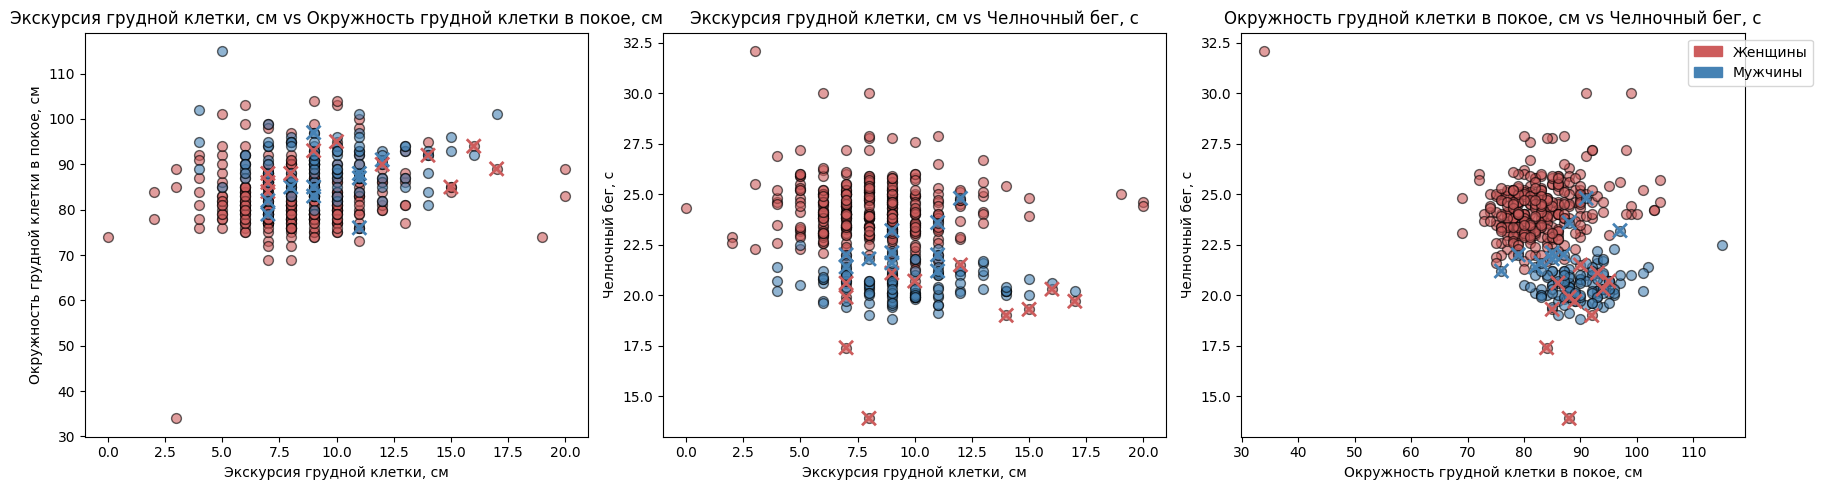

In [2]:
import matplotlib.pyplot as plt
import itertools
import matplotlib.patches as mpatches

feature_names = ['Экскурсия грудной клетки, см', 'Окружность грудной клетки в покое, см', 'Челночный бег, с']
pairs = list(itertools.combinations(range(3), 2))

X_unscaled = scaler.inverse_transform(X_test)

misclassified = (y_test != y_pred)
misclassified_data = X_unscaled[misclassified]
misclassified_labels = y_test[misclassified]

color_map = {1: 'indianred', 0: 'steelblue'}  # 1 - Женщины (положительный), 0 - Мужчины (отрицательный)
class_labels = {1: 'Женщины', 0: 'Мужчины'}


plt.figure(figsize=(18, 5))

for i, (x_idx, y_idx) in enumerate(pairs, start=1):
    plt.subplot(1, 3, i)

    for label, color in color_map.items():
        idx = (y_test == label)
        plt.scatter(X_unscaled[idx, x_idx], X_unscaled[idx, y_idx],
                    color=color, edgecolor='black', s=50, alpha=0.6,
                    label=f'{class_labels[label]} (корректно)')

    plt.scatter(misclassified_data[:, x_idx], misclassified_data[:, y_idx],
                c=misclassified_labels.map(color_map),
                marker='x', s=100, linewidths=2, label='Неверно классифицированные')

    plt.xlabel(feature_names[x_idx])
    plt.ylabel(feature_names[y_idx])
    plt.title(f'{feature_names[x_idx]} vs {feature_names[y_idx]}')

correct_patch_w = mpatches.Patch(color=color_map[1], label='Женщины')
correct_patch_m = mpatches.Patch(color=color_map[0], label='Мужчины')
plt.legend(handles=[correct_patch_w, correct_patch_m], loc='upper right', bbox_to_anchor=(1.15, 1))

plt.tight_layout()
plt.show()